- The purpose of this note is to show you how to use selenium in kaggle notebook.
- Please, do upvote if you find it uselful or intersteing.

# Install

In [ ]:
# install google chrome
!wget https://dl.google.com/linux/linux_signing_key.pub
!sudo apt-key add linux_signing_key.pub
!echo 'deb [arch=amd64] http://dl.google.com/linux/chrome/deb/ stable main' >> /etc/apt/sources.list.d/google-chrome.list
!sudo apt-get -y update
!sudo apt-get install -y google-chrome-stable

--2023-07-25 12:27:23--  https://dl.google.com/linux/linux_signing_key.pub
Resolving dl.google.com (dl.google.com)... 74.125.197.93, 74.125.197.190, 74.125.197.136, ...
Connecting to dl.google.com (dl.google.com)|74.125.197.93|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14605 (14K) [application/octet-stream]
Saving to: ‘linux_signing_key.pub’

linux_signing_key.p 100%[===================>]  14.26K  --.-KB/s    in 0s      

2023-07-25 12:27:23 (30.3 MB/s) - ‘linux_signing_key.pub’ saved [14605/14605]

OK
Get:1 http://dl.google.com/linux/chrome/deb stable InRelease [1825 B]
Get:2 http://packages.cloud.google.com/apt gcsfuse-focal InRelease [5002 B]    
Get:3 https://packages.cloud.google.com/apt cloud-sdk InRelease [6361 B]       
Hit:4 http://archive.ubuntu.com/ubuntu focal InRelease                         
Get:5 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]      
Get:6 http://dl.google.com/linux/chrome/deb stable/main amd64 Packages 

In [ ]:
# install chromedriver
# !apt-get install -y qq unzip
!wget -O /tmp/chromedriver.zip http://chromedriver.storage.googleapis.com/`curl -sS chromedriver.storage.googleapis.com/LATEST_RELEASE`/chromedriver_linux64.zip
!unzip /tmp/chromedriver.zip chromedriver -d /usr/local/bin/

--2023-07-25 12:27:54--  http://chromedriver.storage.googleapis.com/114.0.5735.90/chromedriver_linux64.zip
Resolving chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)... 173.194.203.128, 74.125.199.128, 172.253.117.128, ...
Connecting to chromedriver.storage.googleapis.com (chromedriver.storage.googleapis.com)|173.194.203.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7407250 (7.1M) [application/zip]
Saving to: ‘/tmp/chromedriver.zip’

/tmp/chromedriver.z 100%[===================>]   7.06M  --.-KB/s    in 0.05s   

2023-07-25 12:27:54 (140 MB/s) - ‘/tmp/chromedriver.zip’ saved [7407250/7407250]

Archive:  /tmp/chromedriver.zip
  inflating: /usr/local/bin/chromedriver  


In [ ]:
# install selenium
!sudo apt install -y python3-selenium
!pip install selenium==3.141.0 > /dev/null

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  apparmor chromium-browser chromium-chromedriver liblzo2-2 snapd
  squashfs-tools
Suggested packages:
  apparmor-profiles-extra apparmor-utils zenity | kdialog
The following NEW packages will be installed:
  apparmor chromium-browser chromium-chromedriver liblzo2-2 python3-selenium
  snapd squashfs-tools
0 upgraded, 7 newly installed, 0 to remove and 248 not upgraded.
Need to get 38.7 MB of archives.
After this operation, 174 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 apparmor amd64 2.13.3-7ubuntu5.2 [502 kB]
Get:2 http://archive.ubuntu.com/ubuntu focal/main amd64 liblzo2-2 amd64 2.10-2 [50.8 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 squashfs-tools amd64 1:4.4-1ubuntu0.3 [117 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 snapd am

In [ ]:
# To check Google Chrome's version
!google-chrome --version

Google Chrome 115.0.5790.102 


In [ ]:
# To check Chrome Driver's version
!chromedriver -v

ChromeDriver 114.0.5735.90 (386bc09e8f4f2e025eddae123f36f6263096ae49-refs/branch-heads/5735@{#1052})


# Let's get started!

In [ ]:
# import libraries
import time
from PIL import Image
from selenium import webdriver
from selenium.webdriver.common.by import By

In [ ]:


chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--headless')
chrome_options.add_argument('--disable-gpu')
chrome_options.add_argument('--disable-dev-shm-usage')
chrome_options.add_argument("--window-size=1920,1080")
driver = webdriver.Chrome(options=chrome_options)

In [ ]:
url = 'https://www.openrent.co.uk/properties-to-rent/london?term=London'
driver.get(url)

In [ ]:
from tqdm import tqdm
SCROLL_PAUSE_TIME = 0.5

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")

for i in tqdm(range(100)):
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height

100%|██████████| 100/100 [07:05<00:00,  4.26s/it]


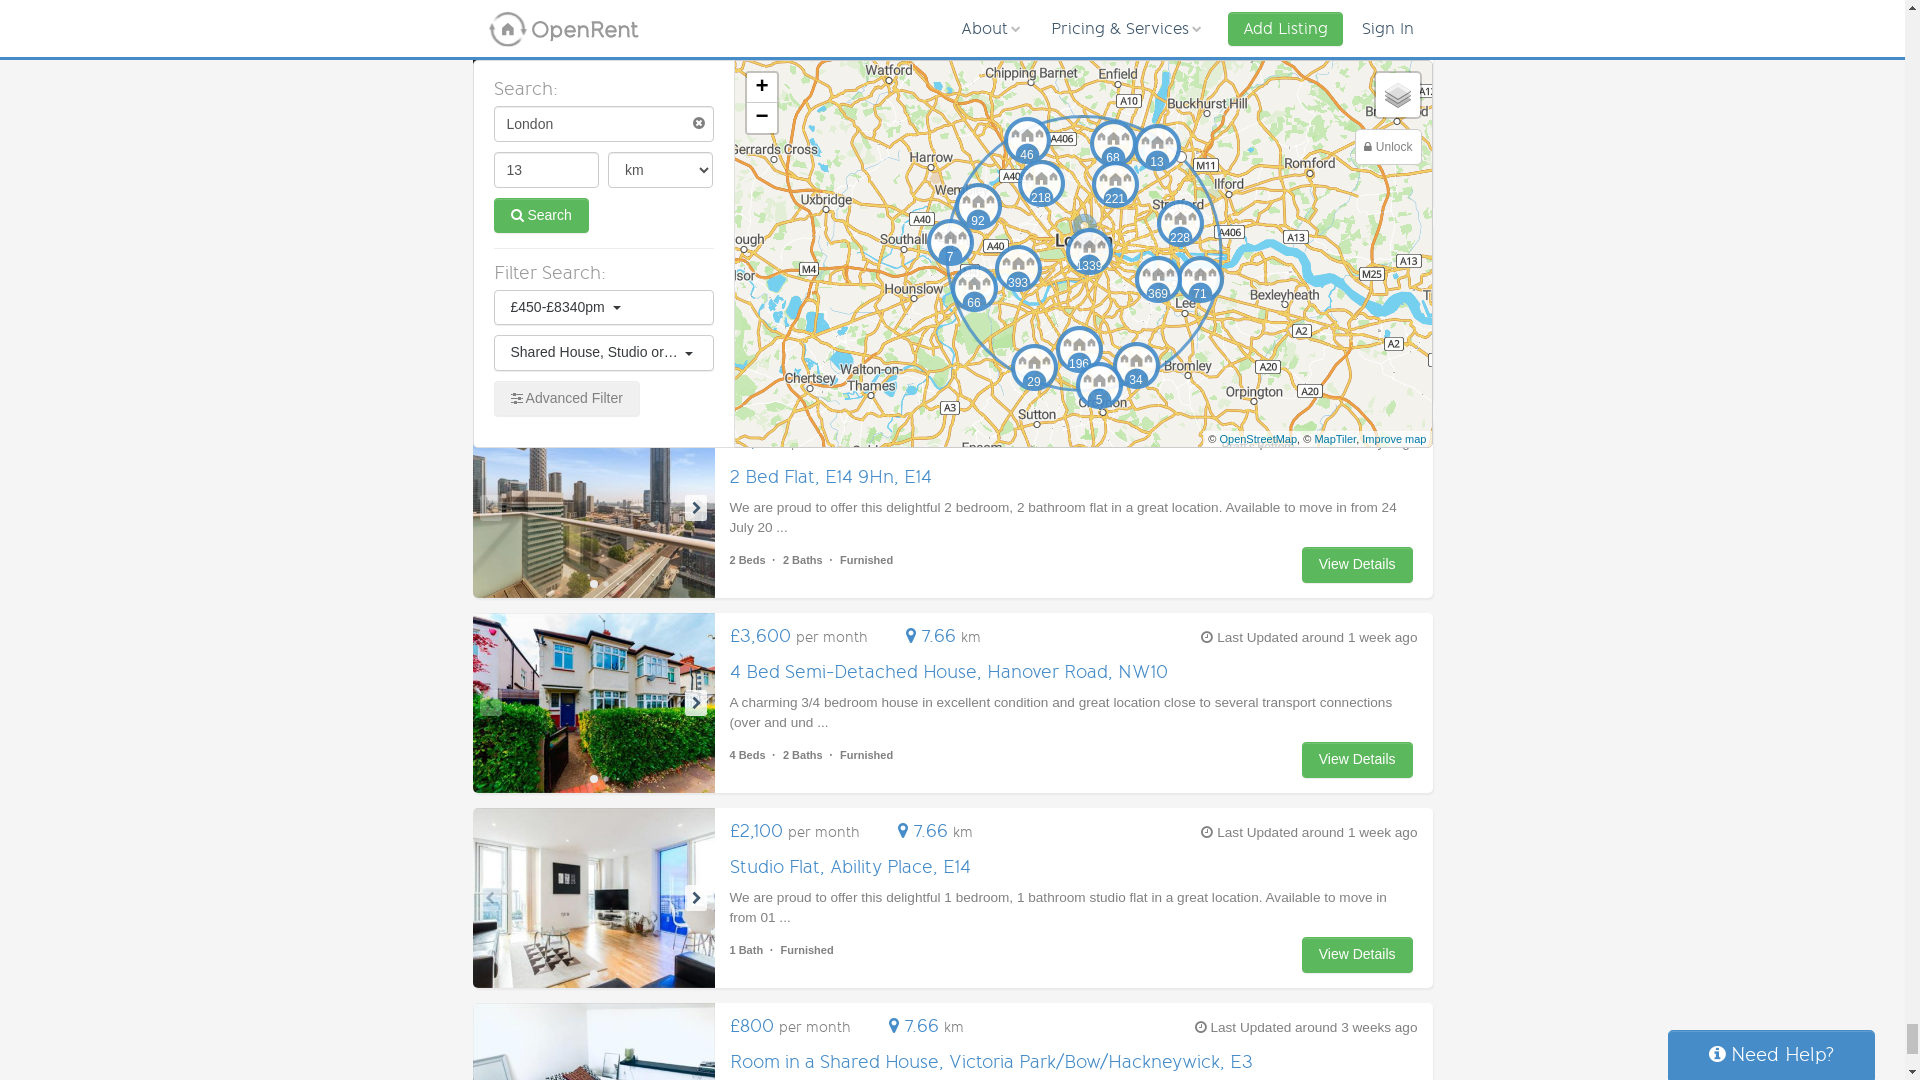

In [ ]:
# take a picture
driver.save_screenshot('result.png')
img = Image.open('result.png')
img

In [ ]:
from bs4 import BeautifulSoup
html_content = driver.page_source

# Parse the HTML content using Beautiful Soup
soup = BeautifulSoup(html_content, 'html.parser')

In [ ]:
property_listings = soup.find(id = 'property-data')

all_links = [propert['href'] for propert in property_listings.find_all('a',class_ = 'pli clearfix')]

In [ ]:
import requests
import pandas as pd

all_specs = []
for link in tqdm(all_links):
    page = requests.get(f'https://www.openrent.co.uk{link}').text.replace('\r','').replace("\n",'').replace('\xa0', ' ')

    # Parse the HTML content using Beautiful Soup
    soup = BeautifulSoup(page, 'html.parser')
    spec_dict = {}
    spec_dict['title'] = soup.find('h1').text
    spec_dict['description'] = soup.find(class_ = 'description').text

    for table in soup.find(id= 'FeaturesTab').find_all('table'):
        for row in table.find_all('tr'):
            feature = row.find_all('td')[0].text#.replace('\n','')#.replace('\r','')
            if len(row.find_all('td')[1].find_all('i'))>0:
                if row.find_all('td')[1].find_all('i')[0]['class'] == 'fa fa-check':
                    value = 'Yes'
                else:
                    value = 'No'
            else:
                value = row.find_all('td')[1].text#.replace('\n','').replace('\r','')
            spec_dict[feature] = value
    station_distances = []
    for row in soup.find(id = 'LocalTransport').find_all('tr')[1:]:
        station = row.find_all('td')[1].text
        distance = row.find_all('td')[2].text
        station_distances.append([station,distance])
    spec_dict['station_distances'] = station_distances
    all_specs.append(spec_dict)

100%|██████████| 2018/2018 [38:39<00:00,  1.15s/it]


In [ ]:
df = pd.DataFrame.from_dict(all_specs, orient='columns')
df.to_csv('Openrent.csv', index = False)
df

,title,description,Deposit,Rent PCM,Bills Included,Broadband,Student Friendly,Families Allowed,Pets Allowed,Smokers Allowed,...,Garden,Parking,Fireplace,Furnishing,EPC Rating,station_distances,DSS Income Accepted,Maximum Tenancy,Students Only,EPC Not Required
0,"2 Bed Flat, Merino Gardens, E1W",Nestled in the...,"£6,461.53","£5,600.00",No,View Offers,No,No,No,No,...,No,No,No,At tenant choice,C,[[ Char...,NaN,NaN,NaN,NaN
1,"1 Bed Flat, Oxendon Street, SW1Y",On the doorste...,"£2,974.99","£2,578.33",No,View Offers,No,No,No,No,...,No,No,No,Furnished,C,[[ Picc...,NaN,NaN,NaN,NaN
2,"2 Bed Flat, Covent Garden, WC2H","Lovely, spacious, newly refurnished, about 75...","£3,230.76","£2,800.00",No,View Offers,No,No,No,No,...,No,No,No,Furnished,D,[[ Leic...,No,NaN,NaN,NaN
3,"1 Bed Flat, Marconi House, WC2R",Beautiful luxu...,"£4,900.00","£4,246.67",No,View Offers,No,No,No,No,...,No,No,No,Furnished,C,[[ Cove...,NaN,NaN,NaN,NaN
4,"2 Bed Flat, Townsend House, W1D",This beautiful...,"£5,192.30","£4,500.00",No,View Offers,No,No,No,No,...,No,No,No,Furnished,C,[[ Tott...,NaN,2 Months,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013,"Room in a Shared Flat, Hooper House, SW18","Bright and specious, this flat comprises thre...",£761.81,£761.81,No,View Offers,No,No,No,No,...,No,No,No,Furnished,NaN,[[ East...,NaN,NaN,NaN,Shared Accommodation
2014,"1 Bed Flat, Campbell Road, E3","Flexi-Lets, Campbell Road E3 (3-12 months; 16...","£1,600.00","£1,600.00",No,View Offers,No,No,No,No,...,No,No,No,Furnished,C,[[ Bow ...,NaN,12 Months,NaN,NaN
2015,"1 Bed Flat, Hampton Tower, E14",Experience luxury living in this exquisite on...,"£3,750.00","£3,250.00",No,View Offers,No,No,No,No,...,No,No,No,Furnished,A,[[ Sout...,NaN,NaN,NaN,NaN
2016,"1 Bed Flat, Reighton Road, E5",This one bedroom property is finished to a hi...,"£2,076.92","£1,800.00",No,View Offers,No,No,No,No,...,No,No,No,Furnished,C,[[ Clap...,NaN,NaN,NaN,NaN


In [ ]:
df.to_csv('Openrent.csv', index = False)

In [ ]:
import os
os.listdir('/kaggle/working/')

['Openrent.csv',
 'result.png',
 'linux_signing_key.pub',
 '__notebook_source__.ipynb']